<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 9

In [1]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from sklearn import datasets
MAX_ITERATIONS = 100

## Introduction:
Say you are given a data set where each observed example has a set of features, but has no labels. Labels are an essential ingredient to a supervised algorithm like Support Vector Machines, which learns a hypothesis function to predict labels given features. So we can't run supervised learning. What can we do?

One of the most straightforward tasks we can perform on a data set without labels is to find groups of data in our dataset which are similar to one another -- what we call clusters.

K-Means is one of the most popular "clustering" algorithms. K-means stores k centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

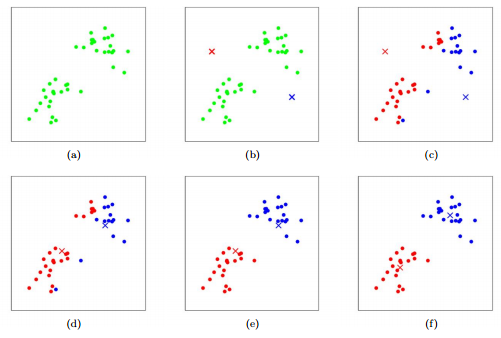

Figure 1: K-means algorithm. Training examples are shown as dots, and cluster centroids are shown as crosses. (a) Original dataset. (b) Random initial cluster centroids. (c-f) Illustration of running two iterations of k-means. In each iteration, we assign each training example to the closest cluster centroid (shown by "painting" the training examples the same color as the cluster centroid to which is assigned); then we move each cluster centroid to the mean of the points assigned to it. Images courtesy of Michael Jordan

## Exercise 1: K-an You Do It? Yes You Can!

In the clustering problem, we are given a training set {x_1, x_2, ... x_m} and want to group the data into a few cohesive "clusters." Here, we are given feature vectors for each data point, x_i which real-values, as usual; but no labels y_i (making this an unsupervised learning problem). Our goal is to predict k centroids and a label c_i for each datapoint. The prediction, c_i is a cluster assignment for x_i . At a high level, the k-means clustering algorithm is as follows:



1.   Initialize **cluster centroids** $μ_1, μ_2, μ_3,....μ_k ∈ ℝ^n$ randomly
2.   Repeat until convergence: {


> For every i, set
>> $c^{(i)}:=arg \underset{j}{min} ||x^{(i)} - μ_j ||^2 $

> For every j, set
>> $μ_j := \frac{∑_{i=1}^m 1 \{c^{(i)} = j\} x^{(i)} }{∑_{i=1}^m 1 \{c^{(i)} = j\}} $

}




Functions to Implement:
*   Get Number of Features
*   Get Centroids
*   Get Random Centroids
*   Should Stop
*   Get Labels
*   K Means

### Function: Get Number of Features
Returns the number of features in the dataset. This corresponds to the number of columns in your dataSet array

In [2]:
def getNumFeatures(dataSet):
  # Find the number of features in the dataset
  numFeatures = len(dataSet[0])
  return numFeatures

### Function: Get Centroids
Returns k random centroids, each of dimension n. Each centroid is the geometric mean of the points that have that centroid's label. 

**Important**: If a centroid is empty (no points have that centroid's label) you should ramdonly re-initialize it.

In [3]:
def getCentroids(dataSet, labels, k):
  #Compute/randomly initialize centroids
  n = dataSet.shape[1]  # dimension of each data point
  centroids = np.zeros((k, n))  # initialize centroids array
  for i in range(k):
      # Find all data points with label i
      points_with_label_i = dataSet[labels == i]
        
      if points_with_label_i.shape[0] > 0:  # if there are any points with label i
          # Compute centroid as the mean of the points with label i
          centroids[i] = np.mean(points_with_label_i, axis=0)
      else:
          # If there are no points with label i, randomly initialize centroid
          centroids[i] = np.random.uniform(low=dataSet.min(axis=0), high=dataSet.max(axis=0), size=n)
  return centroids

### Function: Get Labels
Returns a label for each piece of data in the dataset. For each element in the dataset, choose the closest centroid. Make that centroid the element's label.

In [4]:
def getLabels(dataSet, centroids):
  #Assign each datapoint a label in this function according to the centroids
  # Initialize an array to store the labels for each data point
  labels = np.zeros(dataSet.shape[0], dtype=int)

  # Iterate over all data points in the dataset
  for i in range(dataSet.shape[0]):
      # Compute the distance between the i-th data point and all centroids
      distances = np.linalg.norm(centroids - dataSet[i], axis=1)
        
      # Find the index of the centroid with the smallest distance to the i-th data point
      label = np.argmin(distances)

      # Assign the label to the i-th data point
      labels[i] = label

  return labels

### Function: Get Random Centroids
Randomly initialize the centroids with their corresponding dimensions

In [5]:
def getRandomCentroids(numFeatures, k):
  centroids = np.random.rand(k, numFeatures)
  return centroids

### Function: Should Stop
Returns True or False if K-Means is done. K-Means terminates either because it has run a maximum number of iterations OR the centroids stop changing.

In [6]:
def shouldStop(oldCentroids, centroids, iterations):
  if iterations >= MAX_ITERATIONS:
      return True
  elif np.array_equal(oldCentroids, centroids):
      return True
  else:
      return False

### Function: K Means
K-Means is an algorithm that takes in a dataset and a constant k and returns k centroids (which define clusters of data in the dataset which are similar to one another).

In [8]:
def kmeans(dataSet, k):
    # Initialize centroids randomly
    numFeatures = getNumFeatures(dataSet)
    centroids = getRandomCentroids(numFeatures, k)
    
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = None
    
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids = centroids
        iterations += 1
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids)
        
        # Assign centroids based on datapoint labels
        centroids = getCentroids(dataSet, labels, k)
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids, labels

### Plot Function:
Below is a function that plots the dataset with the centroids, it takes in 4 arguments. You will use this function to plot the progress of your K-Means algorithm


1.   title: Graph Title
2.   dataSet: Dataset that's going to be plotted
3.   labels: The labels for the dataset.
4.   centroids: The centroids of the clusters.



In [13]:
def plotDataSet(title, dataSet, labels, centroids):
  plt.title(title)
  array1 = None
  array2 = None
  array3 = None

  index = 0
  for label in labels:
    if label == 0:
      if array1 is None:
        array1 = dataSet[index]
      else:
        array1 = np.vstack((array1, dataSet[index]))
    if label == 1:
      if array2 is None:
        array2 = dataSet[index]
      else:
        array2 = np.vstack((array2, dataSet[index]))
    if label == 2:
      if array3 is None:
        array3 = dataSet[index]
      else:
        array3 = np.vstack((array3, dataSet[index]))
    index = index + 1
  plt.scatter(array1[:,0], array1[:,1], color="red", s=.2)
  plt.scatter(array2[:,0], array2[:,1], color="green", s=.2)
  plt.scatter(array3[:,0], array3[:,1], color="blue", s=.2)

  plt.scatter(centroids[0][0], centroids[0][1], color="darkred", marker='x', s=50)
  plt.scatter(centroids[1][0], centroids[1][1], color="darkgreen", marker='x', s=50)
  plt.scatter(centroids[2][0], centroids[2][1], color="midnightblue", marker='x', s=50)
  plt.show()

## Exercise 2
Generate a dataset called blobs with the following code:

In [14]:
 from sklearn import datasets
 n_samples = 1500
 blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]

* Run your kmeans algorithm on this dataset with k=3

* Show a scatter plot after iteration 0:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after iteration 9, if the algorithm converges before 9, don't worry about plotting the 9th plot:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after algorithm has terminated

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)


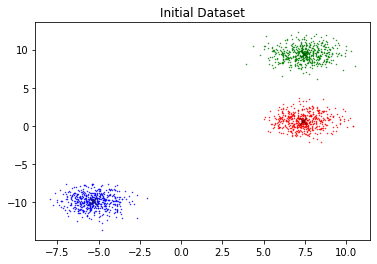

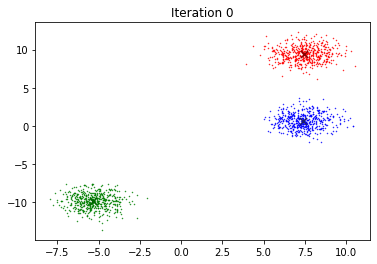

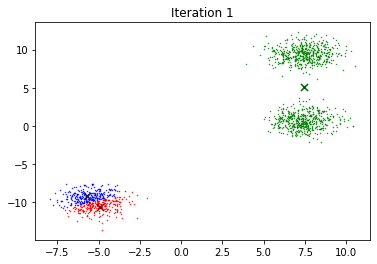

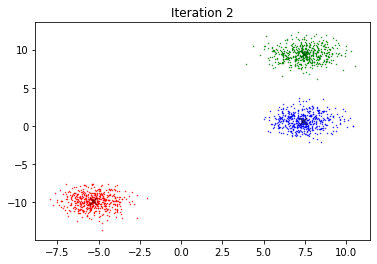

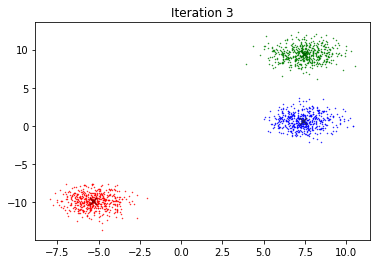

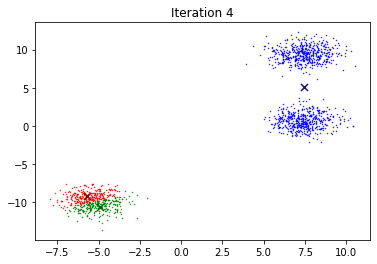

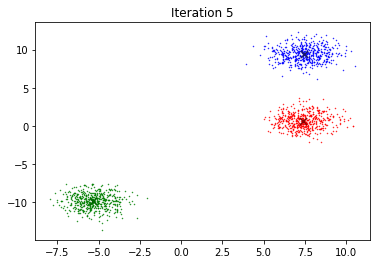

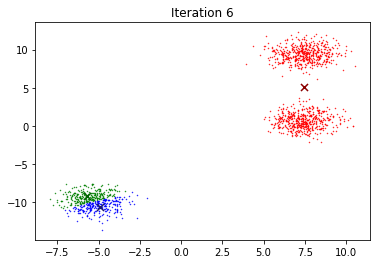

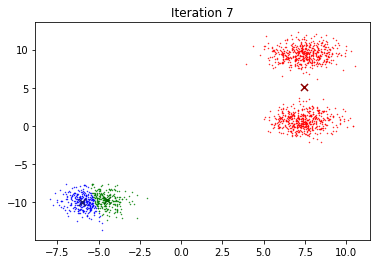

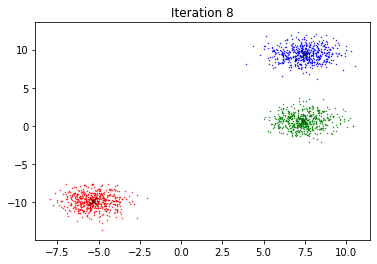

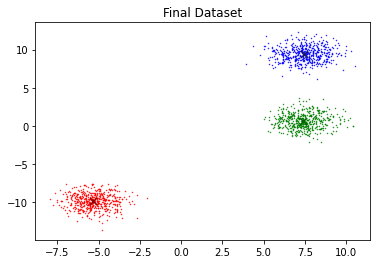

In [25]:
#Enter your code for exercise 2 here
# Run the k-means algorithm
k = 3
centroids, labels = kmeans(blobs, k)

# Plot the initial dataset
plotDataSet("Initial Dataset", blobs, labels, centroids)

# Plot the dataset after 9 iterations
for i in range(9):
    centroids, labels = kmeans(blobs, k)
    plotDataSet(f"Iteration {i}", blobs, labels, centroids)

# Plot the final dataset
plotDataSet("Final Dataset", blobs, labels, centroids)

What do you notice about the predicted clusters as algorithm progresses?

Something that I notice is that as the k-means algorithm progresses, the predicted clusters become slightly more defined and the centroids move towards the center of their respective cluster. If the algorithm converges before the maximum iterations, the clusters will remain stable and the algorithm will end. Also, in the beginning, the clusters may be less defined, with some points being assigned to the wrong cluster, but as the iterations increases, the centroids adjust and the data points are more accurate.

Does the number of centroids, k=3 fit the data?

From the data and scatter plots, I would say that this k value fits pretty well. The clusters are well-separated and distinct, and there are no cases it seems where points beloning to another cluster are jumbled and mixed all together. 

Discuss the quality of the clustering.

The quality of the clustering seems fairly good to me. The algorithm seemed to succeed in identifiying three clusters in the dataset, and the clusters are clearly separated from each other. While the iterations took some time to find the distinct values and accurately group the clusters, by the end they are all colored and distinct, there is no overlapping clusters, the clusters are fairly tight and not super spread out, and overall the quality seems solid.

## Exercise 3
Generate a dataset called noisy moons with the following code:

In [26]:
from sklearn import datasets
n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)[0]

* Run your kmeans algorithm on this dataset with k=3

* Show a scatter plot after iteration 0:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after iteration 9:

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)

* Show a scatter plot after algorithm has terminated

  * Plot the data

  * Color the plots using the estimated categories as labels (see Figure 1 above for example)


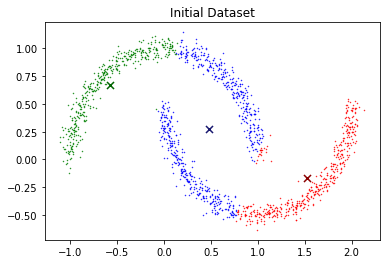

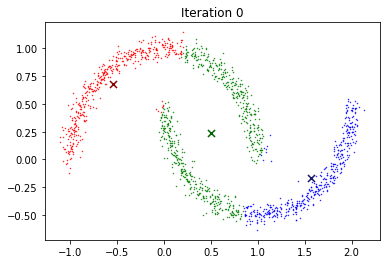

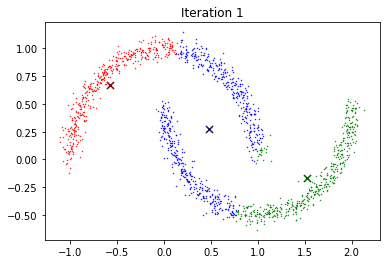

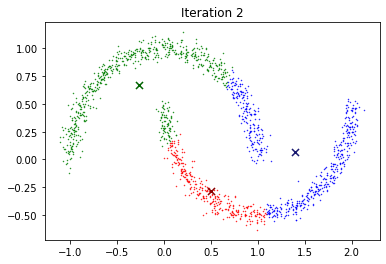

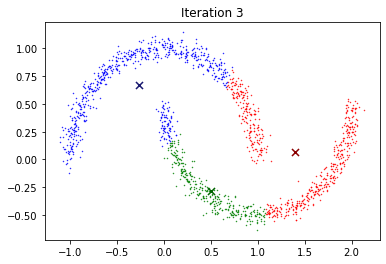

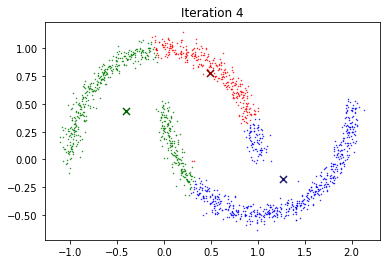

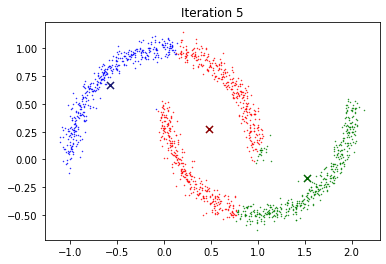

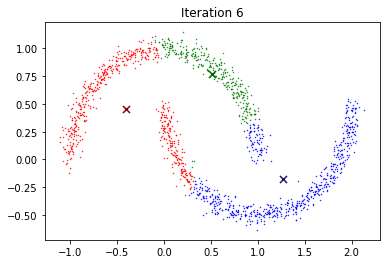

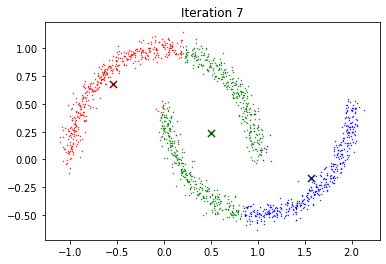

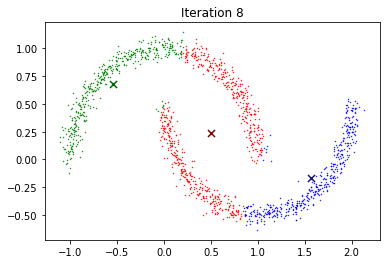

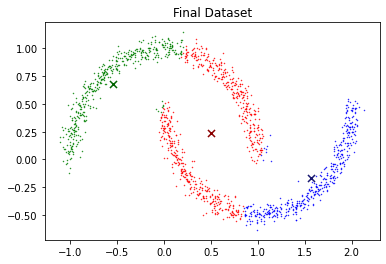

In [27]:
#Enter your code for exercise 2 here
#Enter your code for exercise 2 here
# Run the k-means algorithm
k = 3
centroids, labels = kmeans(noisy_moons, k)

# Plot the initial dataset
plotDataSet("Initial Dataset", noisy_moons, labels, centroids)

# Plot the dataset after 9 iterations
for i in range(9):
    centroids, labels = kmeans(noisy_moons, k)
    plotDataSet(f"Iteration {i}", noisy_moons, labels, centroids)

# Plot the final dataset
plotDataSet("Final Dataset", noisy_moons, labels, centroids)

What do you notice about the predicted clusters as algorithm progresses?

The predicted clusters in this set of data seemed to change a lot as the algorithm went, and it is a super interesting set of plots to see. The shape of the clusters was identified right away, but the groupings was not. First, they were slightly more dispersed, and as the algorithm progressed it had to shift the groups into different positions across the predefined shape. However, as it progressed, and by iteration 8, it seemed to have identified the clusters and it was repeated again at the end, being the final arrangement of clusters. The clusters also grew to be a little closer together each time.

Does the number of centroids, k=3 fit the data?

I would say that the value of k does seem to fit the data, but not perfectly, and not as good as with the other data set. It even seems that there potentially could be a better value of k, which could be found with running more trials with different k values. While it did seem to succeed in finding the clusters, I do notice that by the end, the clusters are all still somewhat close together, and not as spread out and distinctly defined as with the previous data set. Also, there are some values of color that are outliers and fall away from their color cluster into a neighboring color. 

Discuss the quality of the clustering.

The quality of the clustering here is good, but it is not great, and not as good as the previous data set, for which k was a good fitting value. Here, while there are distinct color groups of clustering by the end of the iterations, they are still all close together and even overlap in some ways, including a few outlier points that are in the wrong color cluster, such as some green in the red on the left side, or some blue in the red on the right side. That said, these are still fairly good clusters.

## Exercise 4
Discuss what you learned below

This was a super interesting algorithm to learn about and work through. It was good to learn about k means and the progression of the algorithm through iterations, as it seeks to identify the clusters correctly. I learned that the k-means algorithm is also a relatively simple, but powerful learning algorithm. I can see popular use for such a clustering learning algorithm in statistics, economics, or biology. I think one limiting factor of the algorithm, however, is that it requires the number of clusters to be specified in advance, which might be a challenge when the best number of clusters is unknown. 